<a href="https://colab.research.google.com/github/Juan-jdq/Diseno-y-analisis-de-algoritmos-cuanticos/blob/main/Cap%C3%ADtulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmo para QFT

In [ ]:
%pip install qiskit qiskit-aer pylatexenc
#si hay error en la representación del circuito, reiniciar el entorno de ejecución

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c84f1b1e3c98873f34e0c014e3783df5a3500ab4af53b203093f4a28c229fdd1
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
import qiskit
import pylatexenc
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

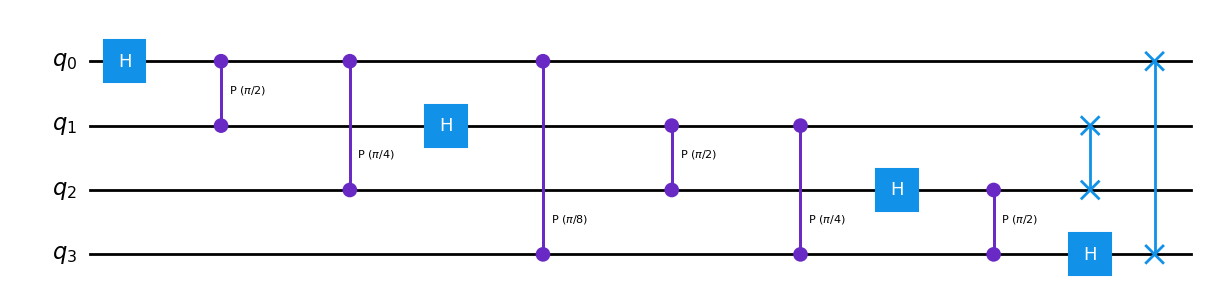

In [ ]:


import numpy as np
from matplotlib import pyplot as plt
def construccionqftcircuit(n):
    qc = QuantumCircuit(n)

    for qubit in range(n):
        # Aplicar la puerta de Hadamard al qubit actual
        qc.h(qubit)

        # Aplicar puertas (R_k)
        for controlqubit in range(qubit+1, n):
            k = controlqubit - qubit + 1
            angle = 2*np.pi/(2**k)
            qc.cp(angle, controlqubit, qubit)

    # Anadir swaps para corregir el orden de los qubits
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)

    return qc

# Configurar visualizacion mas grande
plt.rcParams['figure.figsize'] = (10, 6)

# Ejemplo para 4 qubits
n = 4
qftcircuit = construccionqftcircuit(n)

# Dibujar el circuito
display(qftcircuit.draw('mpl', style='textbook'))

Código para QPE y algoritmo de Shor

In [ ]:
import qiskit
import pylatexenc
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

/tmp/ipython-input-1825471880.py:46: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(num_qubits=t, inverse=True, do_swaps=True)


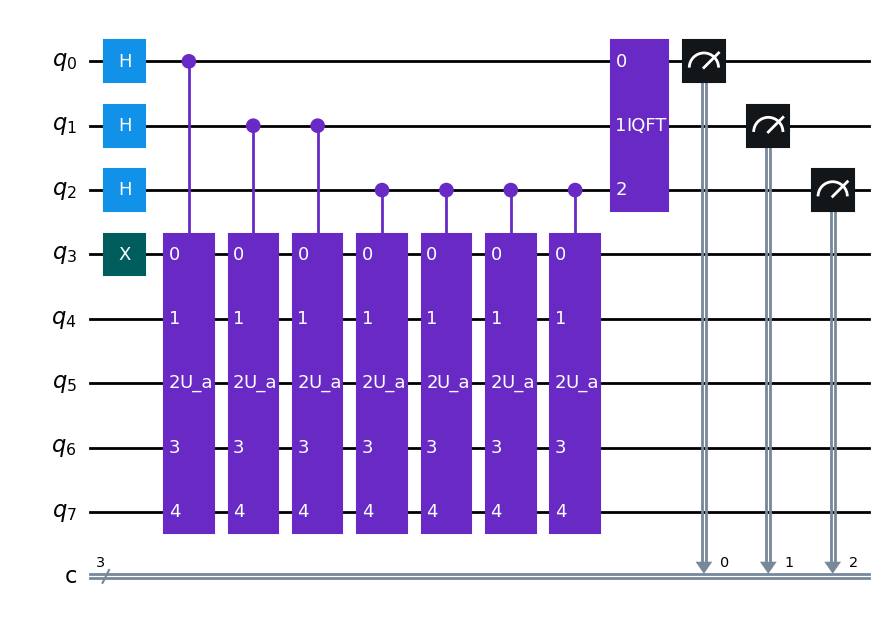

Resultados (conteo): {'001': 262, '100': 406, '010': 120, '111': 260, '101': 237, '110': 105, '000': 389, '011': 269}
m=1, phi≈0.125, mejor fracción ≈ 1/8
m=4, phi≈0.500, mejor fracción ≈ 1/2
m=2, phi≈0.250, mejor fracción ≈ 1/4
m=7, phi≈0.875, mejor fracción ≈ 7/8
m=5, phi≈0.625, mejor fracción ≈ 5/8
m=6, phi≈0.750, mejor fracción ≈ 3/4
m=0, phi≈0.000, mejor fracción ≈ 0
m=3, phi≈0.375, mejor fracción ≈ 3/8


In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.quantum_info import Statevector
from math import gcd
from fractions import Fraction

N = 21
a = 2
L = 5  # trabajo con 5 qubits para representar y mod N (0..31)
t = 3  # qubits de conteo

# Construcción del operador U
mapping = list(range(2**L))
for y in range(21):
    mapping[y] = (a * y) % 21
# valores >=21 los dejamos iguales
from qiskit.circuit.library import UnitaryGate
M = np.zeros((2**L, 2**L), dtype=complex)
for i, j in enumerate(mapping):
    M[j, i] = 1.0
U = UnitaryGate(M, label="U_a")

# Circuito QPE
qc = QuantumCircuit(t + L, t)

# Registro de trabajo en |1>
qc.x(t)

# Hadamards en registro de conteo
qc.h(range(t))

# Controladas U^{2^j}
for j in range(t):
    for _ in range(2**j):
        qc.append(U.control(1), [j] + list(range(t, t+L)))

# Inversa de QFT simplificada
#for j in range(t-1, -1, -1):
#    for k in range(j+1, t):
 #       qc.cp(-np.pi / (2**(k-j)), j, k)
  #  qc.h(j)
from qiskit.circuit.library import QFT

iqft = QFT(num_qubits=t, inverse=True, do_swaps=True)
qc.append(iqft, range(t))

# Medición
qc.measure(range(t), range(t))

display(qc.draw('mpl', style='textbook'))

# Simulación
import qiskit.providers.basic_provider

provider = qiskit.providers.basic_provider.BasicProvider()
backend = provider.get_backend()
counts = backend.run(transpile(qc, backend), shots=2048).result().get_counts()
print("Resultados (conteo):", counts)

# Procesamiento: estimación de r
for m_str, cnt in counts.items():
    m = int(m_str, 2)
    phi_est = m / (2**t)
    frac = Fraction(phi_est).limit_denominator(21)
    print(f"m={m}, phi≈{phi_est:.3f}, mejor fracción ≈ {frac}")

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.quantum_info import Statevector
from math import gcd
from fractions import Fraction

N = 21
a = 2
L = 5  # trabajo con 5 qubits para representar y mod N (0..31)
t = 5  # qubits de conteo

# Construcción del operador U
mapping = list(range(2**L))
for y in range(21):
    mapping[y] = (a * y) % 21
# valores >=21 los dejamos iguales
from qiskit.circuit.library import UnitaryGate
M = np.zeros((2**L, 2**L), dtype=complex)
for i, j in enumerate(mapping):
    M[j, i] = 1.0
U = UnitaryGate(M, label="U_a")

# Circuito QPE
qc = QuantumCircuit(t + L, t)

# Registro de trabajo en |1>
qc.x(t)

# Hadamards en registro de conteo
qc.h(range(t))

# Controladas U^{2^j}
for j in range(t):
    for _ in range(2**j):
        qc.append(U.control(1), [j] + list(range(t, t+L)))

# Inversa de QFT simplificada
#for j in range(t-1, -1, -1):
#    for k in range(j+1, t):
 #       qc.cp(-np.pi / (2**(k-j)), j, k)
  #  qc.h(j)
from qiskit.circuit.library import QFT

iqft = QFT(num_qubits=t, inverse=True, do_swaps=True)
qc.append(iqft, range(t))

# Medición
qc.measure(range(t), range(t))



# Simulación
import qiskit.providers.basic_provider

provider = qiskit.providers.basic_provider.BasicProvider()
backend = provider.get_backend()
counts = backend.run(transpile(qc, backend), shots=2048).result().get_counts()
print("Resultados (conteo):", counts)

# Procesamiento: estimación de r
for m_str, cnt in counts.items():
    m = int(m_str, 2)
    phi_est = m / (2**t)
    frac = Fraction(phi_est).limit_denominator(21)
    print(f"m={m}, phi≈{phi_est:.3f}, mejor fracción ≈ {frac}")

/tmp/ipython-input-384086726.py:46: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(num_qubits=t, inverse=True, do_swaps=True)


Resultados (conteo): {'11011': 219, '00101': 239, '00000': 336, '10000': 328, '00110': 62, '11001': 13, '11100': 18, '00111': 21, '10101': 232, '01011': 238, '10011': 11, '10100': 14, '01101': 6, '01010': 54, '10110': 87, '11010': 61, '00100': 11, '01001': 13, '01000': 5, '11000': 14, '01110': 7, '11101': 8, '10111': 10, '01100': 17, '00001': 8, '00010': 3, '11110': 2, '00011': 3, '10010': 4, '10001': 2, '11111': 2}
m=27, phi≈0.844, mejor fracción ≈ 16/19
m=5, phi≈0.156, mejor fracción ≈ 3/19
m=0, phi≈0.000, mejor fracción ≈ 0
m=16, phi≈0.500, mejor fracción ≈ 1/2
m=6, phi≈0.188, mejor fracción ≈ 3/16
m=25, phi≈0.781, mejor fracción ≈ 7/9
m=28, phi≈0.875, mejor fracción ≈ 7/8
m=7, phi≈0.219, mejor fracción ≈ 2/9
m=21, phi≈0.656, mejor fracción ≈ 13/20
m=11, phi≈0.344, mejor fracción ≈ 7/20
m=19, phi≈0.594, mejor fracción ≈ 10/17
m=20, phi≈0.625, mejor fracción ≈ 5/8
m=13, phi≈0.406, mejor fracción ≈ 7/17
m=10, phi≈0.312, mejor fracción ≈ 5/16
m=22, phi≈0.688, mejor fracción ≈ 11/16
m=2

Código para el algoritmo de Deutsch Jozsa

In [ ]:
import qiskit
import pylatexenc
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:



# Construcción de U_fb3 como oráculo de la función balanceada f(x0,x1,x2) = x0 XOR x1 XOR X2
circ1 = qiskit.QuantumCircuit(4)
circ1.cx(0, 3)
circ1.cx(1, 3)
circ1.cx(2, 3)
gatefb3 = circ1.to_gate(label='U_fb3')

# Construcción de U_fc3 como oráculo de la función constante 0
circ2 = qiskit.QuantumCircuit(4)
gatefc3 = circ2.to_gate(label='U_fc3')


def deutsch_jozsa_algorithm(n,oracle):
  # Crear circuito
  qc = QuantumCircuit(n+1, n)  # n+1 qubits, n bits clasicos

  # Paso 1: Preparacion
  qc.x(n)  # Inicializar auxiliar
  qc.h(range(n+1))  # Hadamard a todos

  # Paso 2: Oraculo
  qc.append(oracle, range(n+1),[])

  # Paso 3: Interferencia
  qc.h(range(n))  # Hadamard solo a entradas

  # Paso 4: Medida
  qc.measure(range(n), range(n))

  # Dibujar circuito
  display(qc.draw('mpl', style='textbook'))

  simulator = AerSimulator()
  qct2 = qiskit.transpile(qc, simulator)
  job = simulator.run(qct2, shots=1024)
  result = job.result()
  counts = result.get_counts()
  print(counts)
  display(qiskit.visualization.plot_histogram(counts))

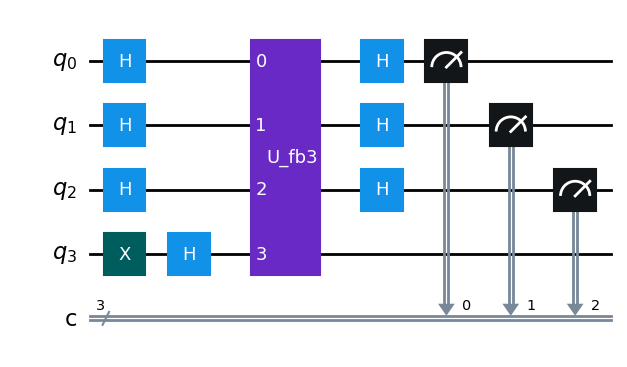

{'111': 1024}


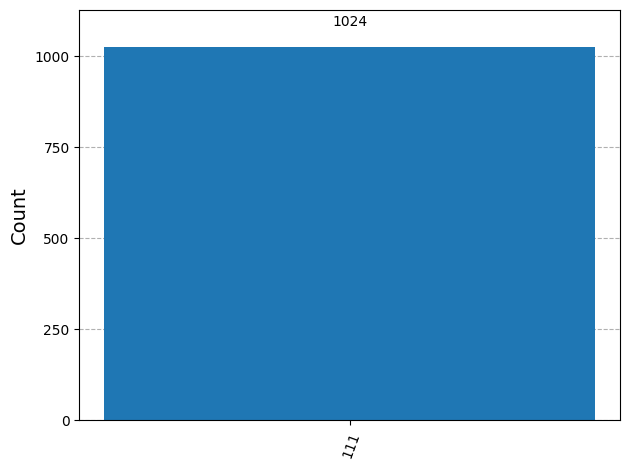

In [ ]:
deutsch_jozsa_algorithm(3,gatefb3)

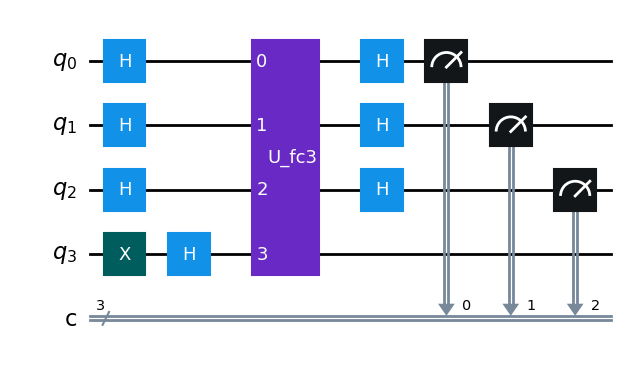

{'000': 1024}


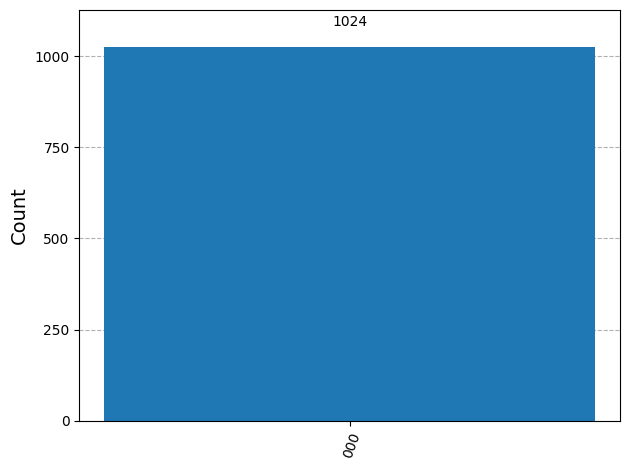

In [ ]:
deutsch_jozsa_algorithm(3,gatefc3)

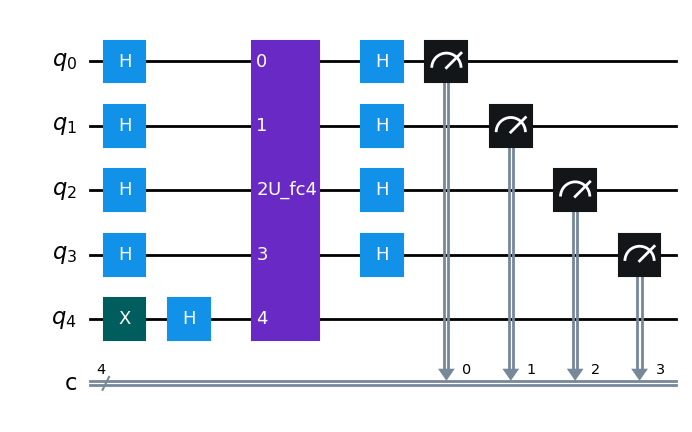

{'0000': 1024}


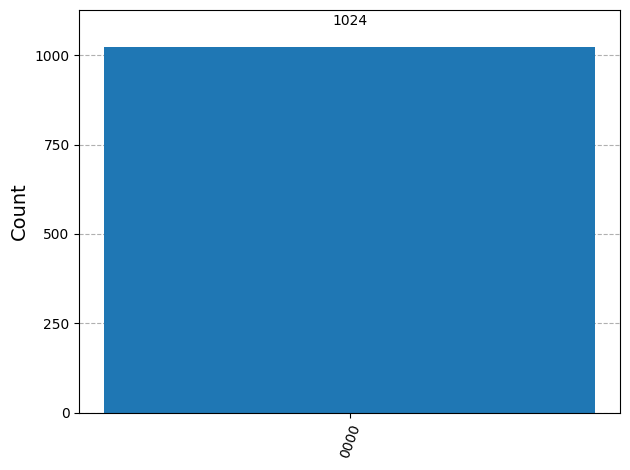

In [ ]:
# Construcción de U_fc3 como oráculo de la función constante 0
circ3 = qiskit.QuantumCircuit(5)
gatefc4 = circ3.to_gate(label='U_fc4')

deutsch_jozsa_algorithm(4,gatefc4)

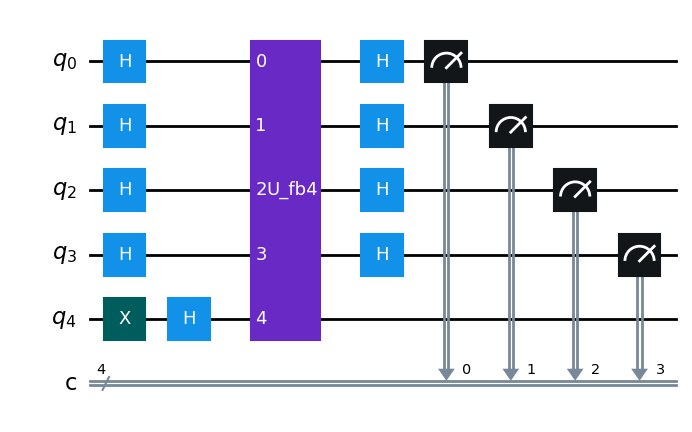

{'1011': 1024}


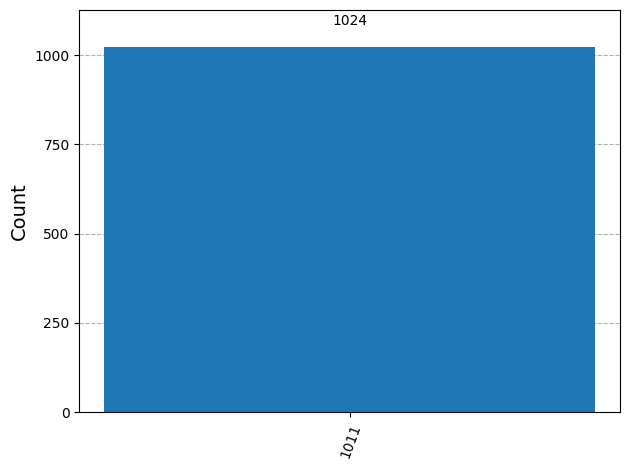

In [ ]:
# Construcción de U_fb4 como oráculo de la función balanceada f(x0,x1,x2,x3) = x0 XOR x1 XOR X3
circ4 = qiskit.QuantumCircuit(5)
circ4.cx(0, 4)
circ4.cx(1, 4)
circ4.cx(3, 4)
gatefb4 = circ4.to_gate(label='U_fb4')
deutsch_jozsa_algorithm(4,gatefb4)